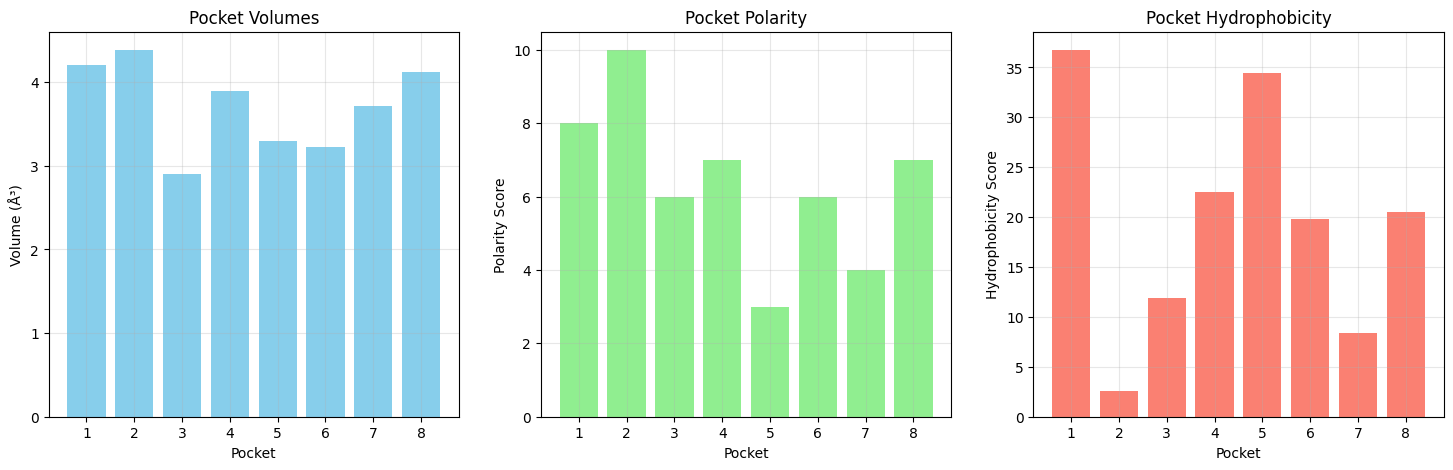

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

fpocket_file = "4QKZ_info.txt"

data = []  # store all pocket info here
current_pocket = {}

with open(fpocket_file) as f:
    for line in f:
        line = line.strip()
        if line.startswith("Pocket"):
            if current_pocket:
                data.append(current_pocket)
            current_pocket = {"Pocket": int(line.split()[1])}
        elif "Volume" in line:
            current_pocket["Volume"] = float(line.split(":")[1].strip())
        elif "Hydrophobicity score" in line:
            current_pocket["Hydrophobicity"] = float(line.split(":")[1].strip())
        elif "Polarity score" in line:
            current_pocket["Polarity"] = int(line.split(":")[1].strip())

# append the last pocket
if current_pocket:
    data.append(current_pocket)

# converting and sorting DataFrame
df = pd.DataFrame(data)
df = df.sort_values("Pocket")

#pocket characterization

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 cols

#volumes
axes[0].bar(df["Pocket"], df["Volume"], color="skyblue")
axes[0].set_xlabel("Pocket")
axes[0].set_ylabel("Volume (Å³)")
axes[0].set_title("Pocket Volumes")
axes[0].grid(alpha=0.3)

#polarity
axes[1].bar(df["Pocket"], df["Polarity"], color="lightgreen")
axes[1].set_xlabel("Pocket")
axes[1].set_ylabel("Polarity Score")
axes[1].set_title("Pocket Polarity")
axes[1].grid(alpha=0.3)

#hydrophobicity
axes[2].bar(df["Pocket"], df["Hydrophobicity"], color="salmon")
axes[2].set_xlabel("Pocket")
axes[2].set_ylabel("Hydrophobicity Score")
axes[2].set_title("Pocket Hydrophobicity")
axes[2].grid(alpha=0.3)

plt.show()


In [24]:
from Bio.PDB import PDBParser
import os

# Path to pocket1 PDB
pdb_file = os.path.join("pockets", "pocket1_atm.pdb")

# Parse structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("pocket1", pdb_file)

residue_numbers = set()

# Collect residue sequence numbers
for model in structure:
    for chain in model:
        for residue in chain:
            residue_numbers.add(residue.get_id()[1])

# Sort and print
for res_num in sorted(residue_numbers):
    print(res_num)

158
159
160
161
188
189
193
194
197
198
214
216
217
218
219
220
221
222
304


/var/folders/54/cck8q42s54xgfphswjhtxwrw0000gn/T/ipykernel_4522/1929370474.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sasa_df = pd.read_csv('sasa_pocket.csv', delim_whitespace=True, header=None, names=['time_ps', 'sasa'])
/var/folders/54/cck8q42s54xgfphswjhtxwrw0000gn/T/ipykernel_4522/1929370474.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rmsd_df = pd.read_csv('rmsd_pocket.csv', delim_whitespace=True, header=None, names=['time_ps', 'rmsd'])
/var/folders/54/cck8q42s54xgfphswjhtxwrw0000gn/T/ipykernel_4522/1929370474.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  volume_df = pd.read_csv('pocket_volume.csv', comment='#', delim_whitespace=True, header=None, names=['time_ps', 'volu

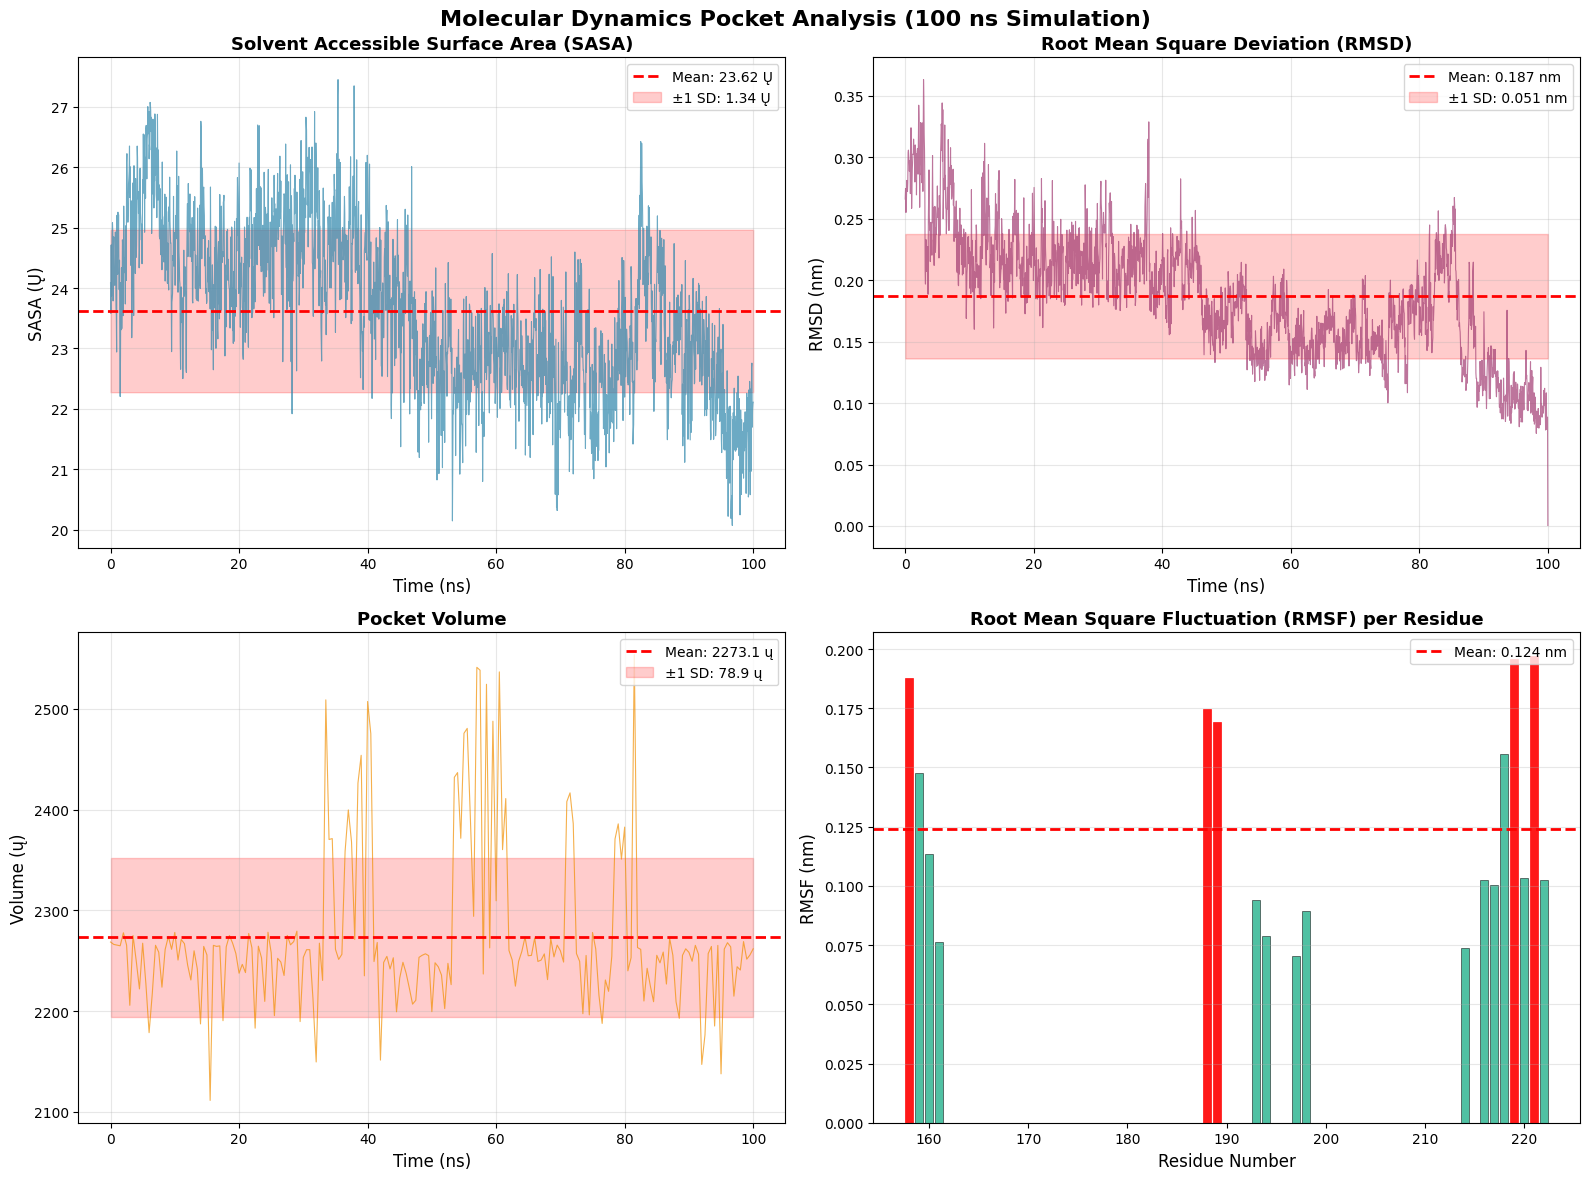

MOLECULAR DYNAMICS POCKET ANALYSIS SUMMARY (100 ns)

1. SOLVENT ACCESSIBLE SURFACE AREA (SASA)
--------------------------------------------------
   Mean SASA:              23.62 ± 1.34 Ų
   Min SASA:               20.07 Ų (at 96.8 ns)
   Max SASA:               27.45 Ų (at 35.4 ns)
   Coefficient of Variation: 5.69%

2. ROOT MEAN SQUARE DEVIATION (RMSD)
--------------------------------------------------
   Mean RMSD:              0.187 ± 0.051 nm
   Min RMSD:               0.000 nm
   Max RMSD:               0.363 nm
   Final RMSD:             0.000 nm
   First 10 ns avg:        0.263 nm
   Last 10 ns avg:         0.107 nm
   Equilibration status:   Not fully equilibrated

3. POCKET VOLUME
--------------------------------------------------
   Mean Volume:            2273.1 ± 78.9 ų
   Min Volume:             2111.2 ų (at 15.5 ns)
   Max Volume:             2553.9 ų (at 81.5 ns)
   Volume Range:           442.7 ų
   Coefficient of Variation: 3.47%

4. ROOT MEAN SQUARE FLUCTUATION (RMSF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Read the CSV files
sasa_df = pd.read_csv('sasa_pocket.csv', delim_whitespace=True, header=None, names=['time_ps', 'sasa'])
rmsd_df = pd.read_csv('rmsd_pocket.csv', delim_whitespace=True, header=None, names=['time_ps', 'rmsd'])
volume_df = pd.read_csv('pocket_volume.csv', comment='#', delim_whitespace=True, header=None, names=['time_ps', 'volume'])
rmsf_df = pd.read_csv('rmsf_pocket.csv', delim_whitespace=True, header=None, names=['residue', 'rmsf'])

# Convert time from ps to ns
sasa_df['time_ns'] = sasa_df['time_ps'] / 1000
rmsd_df['time_ns'] = rmsd_df['time_ps'] / 1000
volume_df['time_ns'] = volume_df['time_ps'] / 1000

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Molecular Dynamics Pocket Analysis (100 ns Simulation)', fontsize=16, fontweight='bold')

# Plot 1: SASA (Solvent Accessible Surface Area)
ax1 = axes[0, 0]
ax1.plot(sasa_df['time_ns'], sasa_df['sasa'], linewidth=0.8, color='#2E86AB', alpha=0.7)
ax1.axhline(sasa_df['sasa'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sasa_df["sasa"].mean():.2f} Ų')
ax1.fill_between(sasa_df['time_ns'], 
                  sasa_df['sasa'].mean() - sasa_df['sasa'].std(), 
                  sasa_df['sasa'].mean() + sasa_df['sasa'].std(), 
                  alpha=0.2, color='red', label=f'±1 SD: {sasa_df["sasa"].std():.2f} Ų')
ax1.set_xlabel('Time (ns)', fontsize=12)
ax1.set_ylabel('SASA (Ų)', fontsize=12)
ax1.set_title('Solvent Accessible Surface Area (SASA)', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: RMSD (Root Mean Square Deviation)
ax2 = axes[0, 1]
ax2.plot(rmsd_df['time_ns'], rmsd_df['rmsd'], linewidth=0.8, color='#A23B72', alpha=0.7)
ax2.axhline(rmsd_df['rmsd'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rmsd_df["rmsd"].mean():.3f} nm')
ax2.fill_between(rmsd_df['time_ns'], 
                  rmsd_df['rmsd'].mean() - rmsd_df['rmsd'].std(), 
                  rmsd_df['rmsd'].mean() + rmsd_df['rmsd'].std(), 
                  alpha=0.2, color='red', label=f'±1 SD: {rmsd_df["rmsd"].std():.3f} nm')
ax2.set_xlabel('Time (ns)', fontsize=12)
ax2.set_ylabel('RMSD (nm)', fontsize=12)
ax2.set_title('Root Mean Square Deviation (RMSD)', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: Pocket Volume
ax3 = axes[1, 0]
ax3.plot(volume_df['time_ns'], volume_df['volume'], linewidth=0.8, color='#F18F01', alpha=0.7)
ax3.axhline(volume_df['volume'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {volume_df["volume"].mean():.1f} ų')
ax3.fill_between(volume_df['time_ns'], 
                  volume_df['volume'].mean() - volume_df['volume'].std(), 
                  volume_df['volume'].mean() + volume_df['volume'].std(), 
                  alpha=0.2, color='red', label=f'±1 SD: {volume_df["volume"].std():.1f} ų')
ax3.set_xlabel('Time (ns)', fontsize=12)
ax3.set_ylabel('Volume (ų)', fontsize=12)
ax3.set_title('Pocket Volume', fontsize=13, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Plot 4: RMSF (Root Mean Square Fluctuation) per residue
ax4 = axes[1, 1]
bars = ax4.bar(rmsf_df['residue'], rmsf_df['rmsf'], color='#06A77D', alpha=0.7, edgecolor='black', linewidth=0.5)
ax4.axhline(rmsf_df['rmsf'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rmsf_df["rmsf"].mean():.3f} nm')
ax4.set_xlabel('Residue Number', fontsize=12)
ax4.set_ylabel('RMSF (nm)', fontsize=12)
ax4.set_title('Root Mean Square Fluctuation (RMSF) per Residue', fontsize=13, fontweight='bold')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3, axis='y')

# Highlight high fluctuation residues (RMSF > mean + 1 SD)
threshold = rmsf_df['rmsf'].mean() + rmsf_df['rmsf'].std()
high_fluctuation = rmsf_df[rmsf_df['rmsf'] > threshold]
for idx, row in high_fluctuation.iterrows():
    bar_idx = rmsf_df.index.get_loc(idx)
    bars[bar_idx].set_color('red')
    bars[bar_idx].set_alpha(0.9)

plt.tight_layout()
plt.savefig('md_pocket_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print Statistical Summary
print("="*80)
print("MOLECULAR DYNAMICS POCKET ANALYSIS SUMMARY (100 ns)")
print("="*80)

print("\n1. SOLVENT ACCESSIBLE SURFACE AREA (SASA)")
print("-" * 50)
print(f"   Mean SASA:              {sasa_df['sasa'].mean():.2f} ± {sasa_df['sasa'].std():.2f} Ų")
print(f"   Min SASA:               {sasa_df['sasa'].min():.2f} Ų (at {sasa_df.loc[sasa_df['sasa'].idxmin(), 'time_ns']:.1f} ns)")
print(f"   Max SASA:               {sasa_df['sasa'].max():.2f} Ų (at {sasa_df.loc[sasa_df['sasa'].idxmax(), 'time_ns']:.1f} ns)")
print(f"   Coefficient of Variation: {(sasa_df['sasa'].std() / sasa_df['sasa'].mean() * 100):.2f}%")

print("\n2. ROOT MEAN SQUARE DEVIATION (RMSD)")
print("-" * 50)
print(f"   Mean RMSD:              {rmsd_df['rmsd'].mean():.3f} ± {rmsd_df['rmsd'].std():.3f} nm")
print(f"   Min RMSD:               {rmsd_df['rmsd'].min():.3f} nm")
print(f"   Max RMSD:               {rmsd_df['rmsd'].max():.3f} nm")
print(f"   Final RMSD:             {rmsd_df['rmsd'].iloc[-1]:.3f} nm")

# Check for equilibration (compare first 10 ns vs last 10 ns)
first_10ns = rmsd_df[rmsd_df['time_ns'] <= 10]['rmsd'].mean()
last_10ns = rmsd_df[rmsd_df['time_ns'] >= 90]['rmsd'].mean()
print(f"   First 10 ns avg:        {first_10ns:.3f} nm")
print(f"   Last 10 ns avg:         {last_10ns:.3f} nm")
print(f"   Equilibration status:   {'Equilibrated' if abs(last_10ns - first_10ns) < 0.05 else 'Not fully equilibrated'}")

print("\n3. POCKET VOLUME")
print("-" * 50)
print(f"   Mean Volume:            {volume_df['volume'].mean():.1f} ± {volume_df['volume'].std():.1f} ų")
print(f"   Min Volume:             {volume_df['volume'].min():.1f} ų (at {volume_df.loc[volume_df['volume'].idxmin(), 'time_ns']:.1f} ns)")
print(f"   Max Volume:             {volume_df['volume'].max():.1f} ų (at {volume_df.loc[volume_df['volume'].idxmax(), 'time_ns']:.1f} ns)")
print(f"   Volume Range:           {volume_df['volume'].max() - volume_df['volume'].min():.1f} ų")
print(f"   Coefficient of Variation: {(volume_df['volume'].std() / volume_df['volume'].mean() * 100):.2f}%")

print("\n4. ROOT MEAN SQUARE FLUCTUATION (RMSF)")
print("-" * 50)
print(f"   Mean RMSF:              {rmsf_df['rmsf'].mean():.3f} ± {rmsf_df['rmsf'].std():.3f} nm")
print(f"   Max RMSF:               {rmsf_df['rmsf'].max():.3f} nm (Residue {rmsf_df.loc[rmsf_df['rmsf'].idxmax(), 'residue']})")
print(f"   Min RMSF:               {rmsf_df['rmsf'].min():.3f} nm (Residue {rmsf_df.loc[rmsf_df['rmsf'].idxmin(), 'residue']})")
print(f"\n   High Fluctuation Residues (> Mean + 1SD):")
for idx, row in high_fluctuation.iterrows():
    print(f"      Residue {int(row['residue'])}: {row['rmsf']:.3f} nm")

print("\n" + "="*80)
print("DRUGGABILITY ASSESSMENT")
print("="*80)

# Druggability criteria
stability_score = "Good" if rmsd_df['rmsd'].std() < 0.1 else "Moderate" if rmsd_df['rmsd'].std() < 0.15 else "Poor"
volume_stability = "Stable" if volume_df['volume'].std() < 200 else "Moderately Stable" if volume_df['volume'].std() < 300 else "Unstable"
accessibility_score = "Good" if sasa_df['sasa'].mean() > 20 else "Moderate" if sasa_df['sasa'].mean() > 15 else "Poor"

print(f"\n   Pocket Stability (RMSD):        {stability_score}")
print(f"   Volume Stability:               {volume_stability}")
print(f"   Solvent Accessibility:          {accessibility_score}")
print(f"   Number of Flexible Residues:    {len(high_fluctuation)} out of {len(rmsf_df)}")

# Overall assessment
if stability_score == "Good" and volume_df['volume'].mean() > 200:
    overall = "HIGHLY DRUGGABLE"
elif stability_score in ["Good", "Moderate"] and volume_df['volume'].mean() > 150:
    overall = "MODERATELY DRUGGABLE"
else:
    overall = "POTENTIALLY CHALLENGING"

print(f"\n   OVERALL DRUGGABILITY:           {overall}")
print("\n" + "="*80)

# Time-dependent analysis
print("\nTIME-DEPENDENT STABILITY ANALYSIS")
print("-" * 50)

# Split simulation into 4 quarters
n_quarters = 4
quarter_size = len(rmsd_df) // n_quarters

for i in range(n_quarters):
    start_idx = i * quarter_size
    end_idx = (i + 1) * quarter_size if i < n_quarters - 1 else len(rmsd_df)
    
    quarter_rmsd = rmsd_df.iloc[start_idx:end_idx]['rmsd'].mean()
    quarter_vol = volume_df.iloc[start_idx//10:end_idx//10]['volume'].mean()  # Volume has fewer points
    
    print(f"   Quarter {i+1} ({int(i*25)}-{int((i+1)*25)} ns):")
    print(f"      Avg RMSD: {quarter_rmsd:.3f} nm    Avg Volume: {quarter_vol:.1f} ų")

print("\n" + "="*80)